In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Chargement
df = pd.read_csv("Customer_Churn.csv")

In [4]:
# Affichage des premières lignes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dimensions du dataset
df.shape  # (lignes, colonnes)

(7043, 21)

In [6]:
# Informations générales (types, valeurs manquantes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Statistiques descriptives pour les variables numériques
print("\n Statistiques descriptives :")
df.describe()


 Statistiques descriptives :


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
# Vérification des valeurs manquantes
print("\n Valeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print(" Aucune valeur manquante détectée!")


 Valeurs manquantes par colonne :
Series([], dtype: int64)
 Aucune valeur manquante détectée!


In [7]:
# Distribution de la variable cible (Churn)
print("\n Distribution de la variable cible 'Churn' :")
print(df['Churn'].value_counts())
print("\n Proportions :")
print(df['Churn'].value_counts(normalize=True) * 100)


 Distribution de la variable cible 'Churn' :
Churn
No     5174
Yes    1869
Name: count, dtype: int64

 Proportions :
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Text(0, 0.5, 'Nombre de clients')

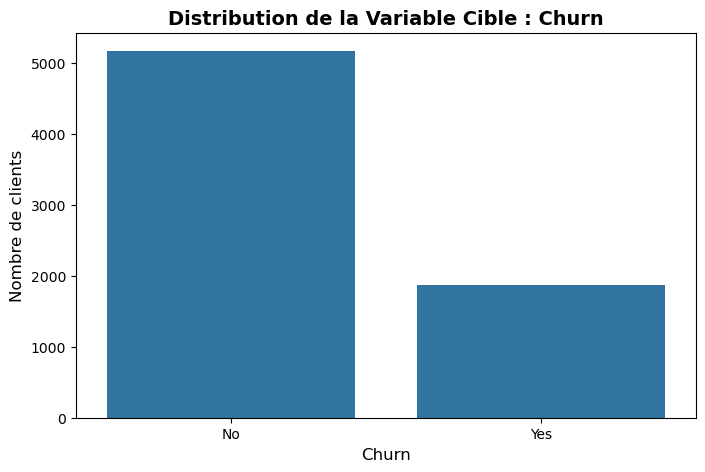

In [8]:
# Visualisation de la distribution du Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution de la Variable Cible : Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

Text(0.5, 1.0, 'Répartition des classes de Churn')

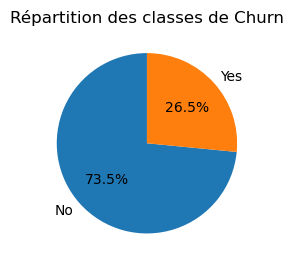

In [9]:
# pie chart
plt.subplot(1,2,2)
df.Churn.value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No', 'Yes'],
    startangle=90
)
plt.ylabel('')
plt.title('Répartition des classes de Churn')
